In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Walmart DataSet.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#check if there is any null values
df.isnull().sum().sum()

#no null values

0

In [7]:
#convert Date datatype
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


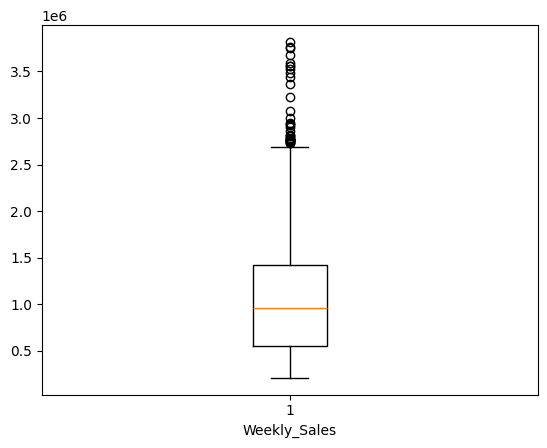

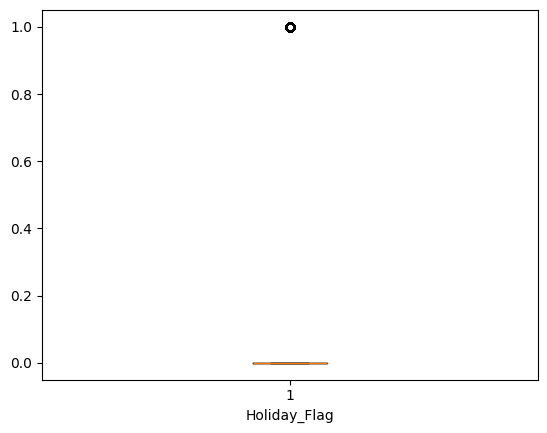

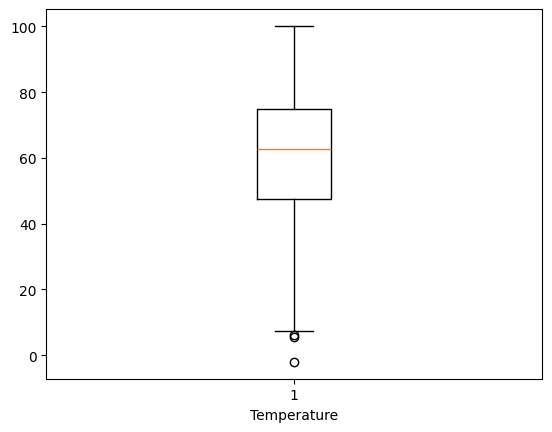

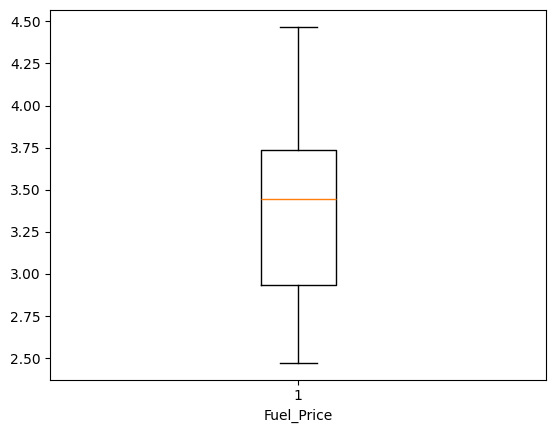

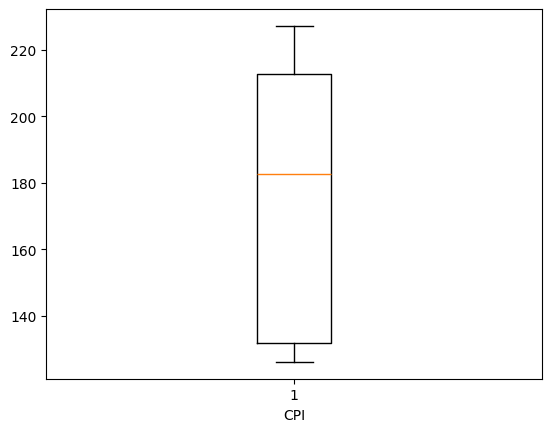

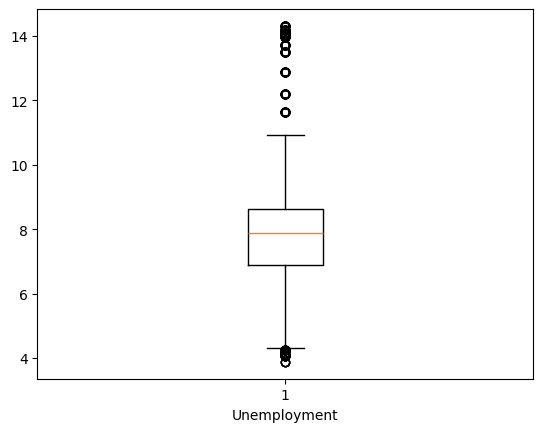

In [9]:
#Outlier Analysis
import matplotlib.pyplot as plt

col_list=["Weekly_Sales","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]
for col in col_list:
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()


#Currently not removing the outliers as its a time series forecasting problem

Analyse the data

In [10]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [11]:
df.Store.nunique()
#data about 45 stores are there

45

In [12]:
df.Date.unique()

<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 143, dtype: datetime64[ns]

In [13]:
df.Date.nunique()

#143 unique dates' data are there for the 45 stores

143

In [14]:
df.groupby("Store")["Date"].count()

#Weekly_Sales data of 143 Dates for each store is mentioned

,Date
Store,
1,143
2,143
3,143
4,143
5,143
6,143
7,143
8,143
9,143


In [15]:
#sum of weekly_sales data for each of the store

df.groupby("Store")["Weekly_Sales"].sum()



,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


<ipython-input-16-1015d3edddd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=["Date","Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"],inplace=True)


<Axes: xlabel='Date'>

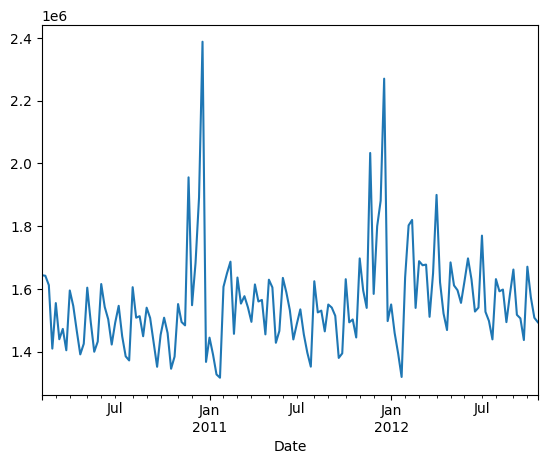

In [16]:
#graphical plot of the weekly sales of Store No:1

df_1=df[df["Store"]==1]
df_1.index=df_1["Date"]
df_1.drop(columns=["Date","Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"],inplace=True)

df_1.Weekly_Sales.plot()

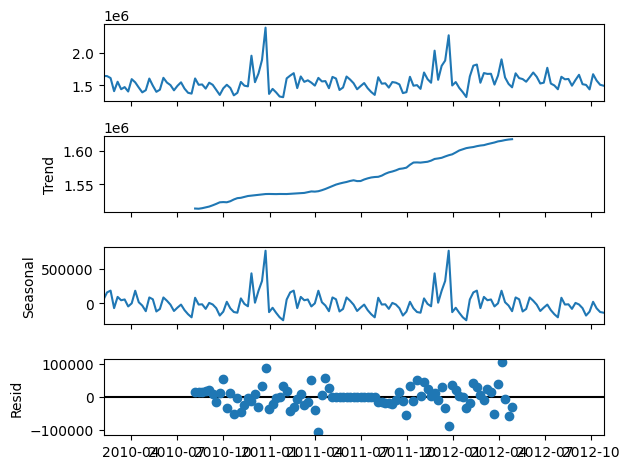

In [17]:
#Visualise its seasonal decomposition of weekly sales data of store no:1

from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df_1)
decompose.plot()
plt.show()

#There is seasonality per each year
#slightly increasing trend
#Noise is present

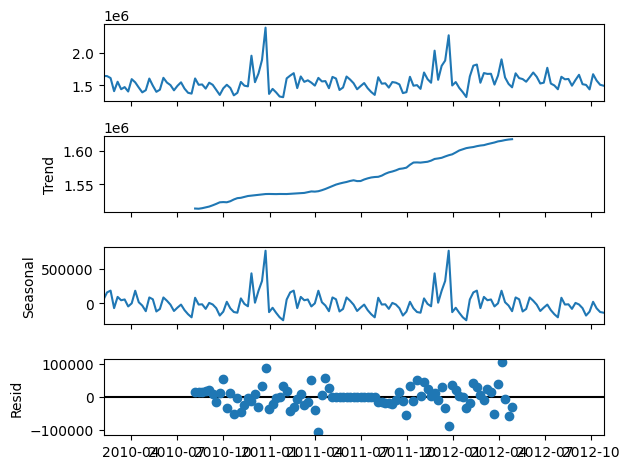

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df_1)
decompose.plot()
plt.show()

#there is increasing trend
#there is seasonality (frequency-each year)
#residual noise is present

<ipython-input-19-13371a21bc0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(columns=["Date","Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"],inplace=True)
<ipython-input-19-13371a21bc0d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.drop(columns=["Date","Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"],inplace=True)


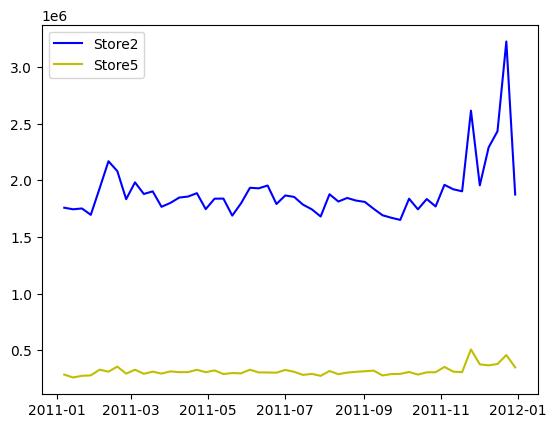

In [19]:
#Compare the sales in the same year for two stores

#sum of weekly sales of Store No:2 in the year 2011

df_2=df[(df["Store"]==2)&(df["Date"].dt.year==2011)]
df_2.index=df_2["Date"]
df_2.drop(columns=["Date","Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"],inplace=True)

#sum of weekly sales of Store No:5 in the year 2011

df_5=df[(df["Store"]==5)&(df["Date"].dt.year==2011)]
df_5.index=df_5["Date"]
df_5.drop(columns=["Date","Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"],inplace=True)

plt.plot(df_2['Weekly_Sales'],color="b",label="Store2")
plt.plot(df_5['Weekly_Sales'],color="y",label="Store5")
plt.legend(loc="best")
plt.show()

In [20]:
'''1. a) If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?'''
Store_num=[]
Corr_val=[]

for i in df["Store"].unique():
  df_unemp=df[df["Store"]==i]
  Store_num.append(i)
  Corr_val.append(df_unemp.corr()["Unemployment"]["Weekly_Sales"])

df_unemp_corr=pd.DataFrame(index=Store_num,data=Corr_val,columns=["CORRELATION"])
df_unemp_corr


,CORRELATION
1,-0.097955
2,0.066325
3,-0.230413
4,-0.337015
5,-0.207043
6,0.044251
7,-0.165382
8,-0.052580
9,-0.191534
10,0.131908


In [21]:
import numpy as np

df_unemp_corr["ABS_CORRELATION"]=np.abs(df_unemp_corr["CORRELATION"])
df_unemp_corr

#adding a column containing absolute values of correlation

,CORRELATION,ABS_CORRELATION
1,-0.097955,0.097955
2,0.066325,0.066325
3,-0.230413,0.230413
4,-0.337015,0.337015
5,-0.207043,0.207043
6,0.044251,0.044251
7,-0.165382,0.165382
8,-0.052580,0.052580
9,-0.191534,0.191534
10,0.131908,0.131908


In [22]:
print(df_unemp_corr[df_unemp_corr["ABS_CORRELATION"]>=0.7])

#Store number 36 is highest positively affected one due to unemployemnt
#Store 38 and 44 comes up next but are negatively affected

    CORRELATION  ABS_CORRELATION
36     0.833734         0.833734
38    -0.785290         0.785290
44    -0.780076         0.780076


<Axes: xlabel='Date'>

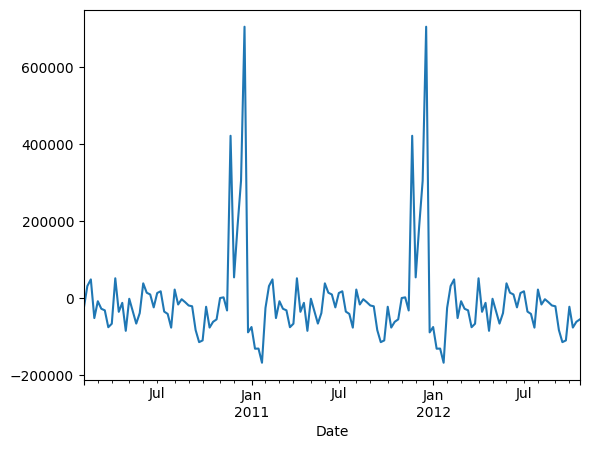

In [23]:
'''b. If the weekly sales show a seasonal trend, when and what could be the reason?'''

#grouping the whole data based on mean value

df_agg=df.groupby("Date")[["Weekly_Sales","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]].mean()

#extract seasonal_decomposition from it

#for that get weekly_sales part from df_agg

df_agg_weekly_sales=df_agg["Weekly_Sales"]
seas_decom=seasonal_decompose(df_agg_weekly_sales)
seas_decom=seas_decom.seasonal
seas_decom.plot()

#Inference: During the months of November and December, the weekly sales is very high
#         : Least sales happens - during  January
#         : Second most least sales- in the month of September

In [24]:
df_agg['seasonal']=seas_decom
df_agg.head(5)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,seasonal
Date,,,,,,,
2010-02-05,1.105572e+06,0.0,34.037333,2.717844,167.730885,8.619311,-24696.510086
2010-02-12,1.074148e+06,1.0,34.151333,2.694022,167.825608,8.619311,32023.120569
2010-02-19,1.072822e+06,0.0,37.719778,2.672067,167.871686,8.619311,49309.443937
2010-02-26,9.770794e+05,0.0,39.243556,2.683933,167.909657,8.619311,-51062.347513
2010-03-05,1.041588e+06,0.0,42.917333,2.731200,167.947628,8.619311,-7397.672917


In [25]:
df_agg.corr()["seasonal"]

#As per the below, temparature has the most correlation with the seasonality.Its negatively correlated with a value of -0.182212

,seasonal
Weekly_Sales,0.972657
Holiday_Flag,0.178212
Temperature,-0.182212
Fuel_Price,-0.103395
CPI,-0.054574
Unemployment,0.088396
seasonal,1.000000


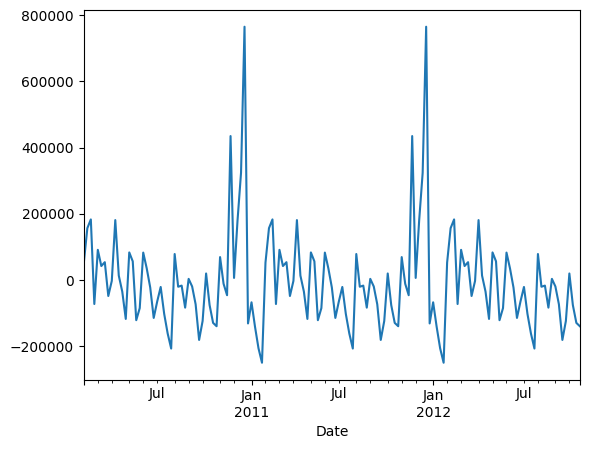

In [26]:
#checking the seasonality of an individual store

df_1=df[df["Store"]==1]
df_1.index=df_1["Date"]

df_1_weekly_sales=df_1["Weekly_Sales"]
seas_decom=seasonal_decompose(df_1_weekly_sales)
seas_decom=seas_decom.seasonal
seas_decom.plot();

#Inference: During the months of November and December, the weekly sales is very high
#         : Least sales happens - during end of January
#         : Second most least sales- during end of July

In [27]:
df_1['seasonal']=seas_decom
df_1.head(5)

<ipython-input-27-72b9cab3871b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['seasonal']=seas_decom


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,seasonal
Date,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,52357.762287
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,156391.364691
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,182889.268105
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,-72996.946799
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,90833.297960


In [28]:
df_1.corr()["seasonal"]

#As per the below, temparature has the most correlation with the seasonality.Its negatively correlated with a value of 0.291349

,seasonal
Store,NaN
Date,-0.089998
Weekly_Sales,0.913393
Holiday_Flag,0.196014
Temperature,-0.291349
Fuel_Price,-0.086738
CPI,-0.073909
Unemployment,0.165196
seasonal,1.000000


In [29]:
'''c. Does temperature affect the weekly sales in any manner?'''

#In case of seasonality component of the aggregate weekly sales data(by mean)

#As mentioned in the question b, temparature has the most correlation with the seasonality present in the aggregate of
#weekly sales data of all the 45 stores.
#Its negatively correlated with a value of -0.182212(Very less correlation)

#this is in case of aggregate value of weekly_sales during the years 2010,2011,2012

'c. Does temperature affect the weekly sales in any manner?'

In [30]:
#In case of the aggregate weekly sales data(by mean)

df_agg.corr()
#In case of the aggrgate value of weekly_sales,weekly_sales has a negative correlation by a value of -0.159160 with Temperature
#(less correlation)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,seasonal
Weekly_Sales,1.000000,0.172683,-0.159160,-0.056722,0.023413,0.003524,0.972657
Holiday_Flag,0.172683,1.000000,-0.189186,-0.084039,-0.027542,0.042639,0.178212
Temperature,-0.159160,-0.189186,1.000000,0.205757,0.159457,-0.168460,-0.182212
Fuel_Price,-0.056722,-0.084039,0.205757,1.000000,0.824704,-0.747205,-0.103395
CPI,0.023413,-0.027542,0.159457,0.824704,1.000000,-0.977430,-0.054574
Unemployment,0.003524,0.042639,-0.168460,-0.747205,-0.977430,1.000000,0.088396
seasonal,0.972657,0.178212,-0.182212,-0.103395,-0.054574,0.088396,1.000000


Axes(0.125,0.11;0.775x0.77)


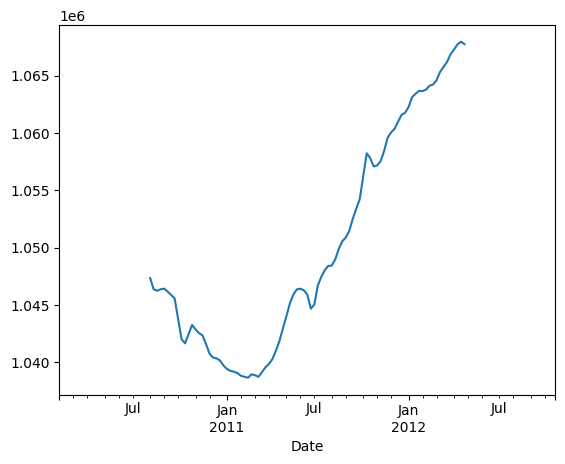

In [31]:
#considering the trend component of aggregate weekly sales data(by mean)
seas_decom=seasonal_decompose(df_agg_weekly_sales)
seas_decom=seas_decom.trend
df_agg["Trend"]=seas_decom
print(seas_decom.plot())
#Overall increasing trend

In [32]:
df_agg.head(5)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,seasonal,Trend
Date,,,,,,,,
2010-02-05,1.105572e+06,0.0,34.037333,2.717844,167.730885,8.619311,-24696.510086,NaN
2010-02-12,1.074148e+06,1.0,34.151333,2.694022,167.825608,8.619311,32023.120569,NaN
2010-02-19,1.072822e+06,0.0,37.719778,2.672067,167.871686,8.619311,49309.443937,NaN
2010-02-26,9.770794e+05,0.0,39.243556,2.683933,167.909657,8.619311,-51062.347513,NaN
2010-03-05,1.041588e+06,0.0,42.917333,2.731200,167.947628,8.619311,-7397.672917,NaN


In [33]:
df_agg.corr()

#Temperature affect the trend of aggregate weekly sales data negatively by the value of 0.066900

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,seasonal,Trend
Weekly_Sales,1.000000,0.172683,-0.159160,-0.056722,0.023413,0.003524,0.972657,0.082829
Holiday_Flag,0.172683,1.000000,-0.189186,-0.084039,-0.027542,0.042639,0.178212,0.006473
Temperature,-0.159160,-0.189186,1.000000,0.205757,0.159457,-0.168460,-0.182212,-0.066900
Fuel_Price,-0.056722,-0.084039,0.205757,1.000000,0.824704,-0.747205,-0.103395,0.418547
CPI,0.023413,-0.027542,0.159457,0.824704,1.000000,-0.977430,-0.054574,0.901933
Unemployment,0.003524,0.042639,-0.168460,-0.747205,-0.977430,1.000000,0.088396,-0.926498
seasonal,0.972657,0.178212,-0.182212,-0.103395,-0.054574,0.088396,1.000000,0.000307
Trend,0.082829,0.006473,-0.066900,0.418547,0.901933,-0.926498,0.000307,1.000000


In [34]:
#checking the correlation of Temperature with the weekly sales of each individual store

Store_num=[]
Corr_val=[]

for i in df["Store"].unique():
  temp=df[df["Store"]==i]
  Store_num.append(i)
  Corr_val.append(temp.corr()["Temperature"]["Weekly_Sales"])

df_temp_corr=pd.DataFrame(index=Store_num,data=Corr_val,columns=["CORRELATION"])
df_temp_corr

,CORRELATION
1,-0.222701
2,-0.297673
3,-0.377524
4,-0.225583
5,-0.175517
6,-0.084863
7,0.015077
8,-0.312324
9,-0.208343
10,-0.432569


In [35]:
df_temp_corr["ABS_CORRELATION"]=np.abs(df_temp_corr["CORRELATION"])
df_temp_corr

,CORRELATION,ABS_CORRELATION
1,-0.222701,0.222701
2,-0.297673,0.297673
3,-0.377524,0.377524
4,-0.225583,0.225583
5,-0.175517,0.175517
6,-0.084863,0.084863
7,0.015077,0.015077
8,-0.312324,0.312324
9,-0.208343,0.208343
10,-0.432569,0.432569


In [36]:
print(df_temp_corr[df_temp_corr["ABS_CORRELATION"]==np.max([df_temp_corr["ABS_CORRELATION"]])])
print(df_temp_corr[df_temp_corr["ABS_CORRELATION"]==np.min([df_temp_corr["ABS_CORRELATION"]])])

#Store 10 is the store whose weekly sales was affected maximum by temperature by value of -0.432569
#Store 7 is the store whose weekly sales was affected minimum by temperature by value of 0.015077

'''To summarise, the temparature does not affect any store's weekly sales value at a very high level
but on a level of very less[Store No:7, Correlation: 0.015077] upto
an average value[Store No:10, Correlation: -0.432569]'''

    CORRELATION  ABS_CORRELATION
10    -0.432569         0.432569
   CORRELATION  ABS_CORRELATION
7     0.015077         0.015077


"To summarise, the temparature does not affect any store's weekly sales value at a very high level\nbut on a level of very less[Store No:7, Correlation: 0.015077] upto\nan average value[Store No:10, Correlation: -0.432569]"

In [37]:
'''d. How is the Consumer Price index affecting the weekly sales of various stores?'''

#To find the correlation value of CPI with each individual store

Store_num=[]
Corr_val=[]

for i in df["Store"].unique():
  cpi=df[df["Store"]==i]
  Store_num.append(i)
  Corr_val.append(cpi.corr()["CPI"]["Weekly_Sales"])

df_cpi_corr=pd.DataFrame(index=Store_num,data=Corr_val,columns=["CORRELATION"])
df_cpi_corr

,CORRELATION
1,0.225408
2,-0.062431
3,0.317250
4,0.351157
5,0.308261
6,-0.011357
7,0.289044
8,0.120255
9,0.294805
10,-0.115374


In [38]:
df_cpi_corr["ABS_CORRELATION"]=np.abs(df_cpi_corr["CORRELATION"])
df_cpi_corr

,CORRELATION,ABS_CORRELATION
1,0.225408,0.225408
2,-0.062431,0.062431
3,0.317250,0.317250
4,0.351157,0.351157
5,0.308261,0.308261
6,-0.011357,0.011357
7,0.289044,0.289044
8,0.120255,0.120255
9,0.294805,0.294805
10,-0.115374,0.115374


In [39]:
print(df_cpi_corr[df_cpi_corr["ABS_CORRELATION"]>=0.7])

#Store 36,38,44 were affected by the CPI at a high level.
#Their correlation values are  -0.915095,0.812837,0.740150 respectively

    CORRELATION  ABS_CORRELATION
36    -0.915095         0.915095
38     0.812837         0.812837
44     0.740150         0.740150


In [40]:
print(df_cpi_corr[df_cpi_corr["ABS_CORRELATION"]<=0.1])

#At the same time, there are stores which were affected by CPI by a negligible amount
#Store 2,6,11,12,20,22,23,24,25,28,29,33 and 45 comes under this category

    CORRELATION  ABS_CORRELATION
2     -0.062431         0.062431
6     -0.011357         0.011357
11     0.069781         0.069781
12     0.084087         0.084087
20     0.058706         0.058706
22    -0.038602         0.038602
23     0.084248         0.084248
24    -0.013684         0.013684
25    -0.010914         0.010914
28    -0.095908         0.095908
29    -0.072530         0.072530
33    -0.052271         0.052271
45    -0.023548         0.023548


In [41]:
'''e. Top performing stores according to the historical data.'''

df_tot_sales=df.pivot_table(index="Store",values="Weekly_Sales")

df_tot_sales.sort_values(by="Weekly_Sales",ascending=False).head(5)
#Top 5 performing stores :- 20,4,14,13,2

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06


In [42]:
'''f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.'''

df_tot_sales=df.pivot_table(index="Store",values="Weekly_Sales")

df_tot_sales.sort_values(by="Weekly_Sales",ascending=True).head(1)
#Worst performing store: 33

#From the question e, Highest performing Store: 20

,Weekly_Sales
Store,
33,259861.692028


In [43]:
#Differnece between lowest and highest performing store

max(df_tot_sales["Weekly_Sales"])-min(df_tot_sales["Weekly_Sales"])

#Highest Performing Store had done 1847815 more sales than the worst performing store during the given period of time

1847815.1783216782

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [44]:
!pip install pmdarima
from pmdarima import auto_arima   #import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX  #import sarimax


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [46]:
import warnings
warnings.filterwarnings("ignore")


for i in df["Store"].unique():
  df_pred=df[df["Store"]==i]
  df_pred.index=df_pred["Date"]
  df_pred.drop("Date",axis=1,inplace=True)
  print("Data for the Store No:- ",i," is as below")
  print(df_pred)   #Filtered Dataframe containing the data related to Store No: "i" in the loop

###############################################################################################

  #check if the data is stationary
  from statsmodels.tsa.stattools import adfuller

  result=adfuller(df_pred["Weekly_Sales"])
  if result[1]<0.05:
    print("Data provided for Store No: ",i," is stationary")
  else:
    print("Data provided for Store No: ",i," is not stationary")
  #if data is stationary , we can proceed further with the model building
###############################################################################################

  # splitting the data to train and test set
  train=df_pred[:115]["Weekly_Sales"]
  test=df_pred[115:]["Weekly_Sales"]

###################################################################################################

  #applying auto_arima on the weekly_sales data inorder to get the parameters to be used in the sarima model
  auto=auto_arima(df_pred["Weekly_Sales"])
  print(auto.summary())
  sarimax_order = auto.order   #copying the arimax order to the variable sarimax_order
  print("Parameters for the model is: ",sarimax_order)
  #since weekly data is given and seasonality occurs every year[1 year=52 weeks],adding 52 to parameter:-seasonal_order
  seasonal_order=sarimax_order+(52,)
  print("Seasonal parameter for the model is: ",seasonal_order)

####################################################################################################################
  #training sarima model using the training data and the parameters obtained earlier
  model=SARIMAX(train,order=sarimax_order,seasonal_order=seasonal_order)
  model=model.fit()

##########################################################################################
  df_pred["Predicted"]=model.predict(start=len(train),end=len(train)+len(test)-1)
  #print(df_pred[["Weekly_Sales","Predicted"]].plot())
  #print(plt.title(f"Predicted test data results of Store {i}"))
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
  df_pred[["Weekly_Sales", "Predicted"]].plot(ax=ax1, legend=True)
  ax1.set_title(f"Predicted test data results of Store {i}")
  ax1.set_xlabel('Date')
  ax1.legend(loc="best")


############################################################################################
  forecast=model.forecast(steps=40)
  print("Below is the forecasted weekly_sales data for the next 12 weeks for the store: ",i)
  print(forecast.tail(12))  #predicted value for the next 12 weeks

#############################################################################################
  df_pred["Weekly_Sales"].plot(ax=ax2, legend=True, color='blue', label='Weekly Sales')
  # Plot Forecast
  forecast.plot(ax=ax2, legend=True, color='orange', label='Forecast')

  # Set title, labels, and legend
  ax2.set_title(f'Weekly Sales and Forecast for the Next 12 Weeks for Store {i}')
  ax2.set_xlabel('Date')
  ax2.legend(loc="best")

  '''
  print(df_pred["Weekly_Sales"].plot())
  print(forecast.plot())
  print(plt.title(f"Forecasted weekly_sales data for the next 12 weeks for Store {i}"))
'''

###############################################################################################

  df_pred = df_pred[0:0]  #remove the contents of the dataframe
  print("\n\n\n")

Output hidden; open in https://colab.research.google.com to view.